In [29]:
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
import numpy
import matplotlib.pyplot as plt

In [7]:
seqx = SeqIO.read("x.fasta","fasta")
seqy = SeqIO.read("y.fasta","fasta")

print(len(seqx))
print(len(seqy))

1883
1050


In [5]:
print(seqx.id)

XM_006779407.2


In [6]:
print(seqx)

ID: XM_006779407.2
Name: XM_006779407.2
Description: XM_006779407.2 PREDICTED: Myotis davidii seryl-tRNA synthetase (SARS), mRNA
Number of features: 0
Seq('ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGC...TCA')


In [11]:
print(seqx.seq.find("CGC"))
print(seqy.seq.find("CGC"))

51
39


In [20]:
seq1 = seqx.seq[:20] + seqx.seq[-5:]
print(seqx.seq)
print(seq1)

ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCAC

In [21]:
seq2 = seqy.seq[:20] + seqy.seq[-3:]
print(seqy.seq)
print(seq2)

GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAGCTCG

In [22]:
seqZ = seq1 + seq2
print(seqZ)
seqZ = seqZ[::-1]
print(seqZ)

ATGGTGTTGGATCTGGACTTAGTCAGTGTCAGTGGAACTTTGGCAGAC
CAGACGGTTTCAAGGTGACTGTGACTGATTCAGGTCTAGGTTGTGGTA


In [25]:
ac = [x for x in seqZ if x in 'AC']

print(ac)

['C', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'A']


In [28]:
from collections import Counter

count = Counter(ac)

print(count)

Counter({'A': 10, 'C': 7})


<function matplotlib.pyplot.show(close=None, block=None)>

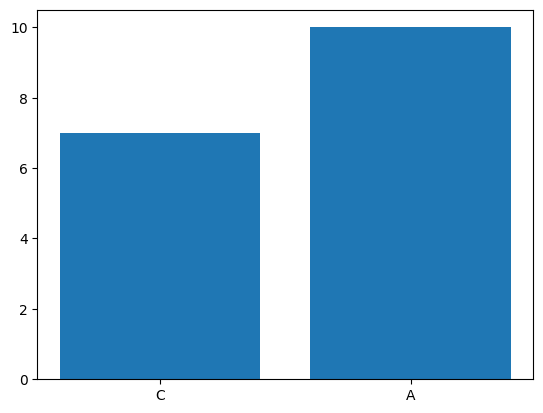

In [31]:
plt.bar(count.keys(), count.values())
plt.show

In [32]:
from Bio.SeqUtils import gc_fraction

GC = gc_fraction(seqZ)
AT = 1 - GC

print(GC)
print(AT)

0.4791666666666667
0.5208333333333333


In [34]:
from Bio.SeqUtils import MeltingTemp as mt 

print(mt.Tm_Wallace(seqZ))

142.0


In [35]:
from Bio.SeqUtils import molecular_weight as mw

print(mw(seqZ))

15004.545300000002


In [37]:
rnaZ = seqZ.transcribe()
print(seqZ)
print(rnaZ)

CAGACGGTTTCAAGGTGACTGTGACTGATTCAGGTCTAGGTTGTGGTA
CAGACGGUUUCAAGGUGACUGUGACUGAUUCAGGUCUAGGUUGUGGUA


In [44]:
from Bio.SeqUtils import seq3, seq1
acids = rnaZ.translate()

print(acids)

acids2 = seqZ.translate()

print(acids2)

print(seq1(seqZ))

QTVSR*L*LIQV*VVV
QTVSR*L*LIQV*VVV
XXXXXXXXXXXXXXXX


In [47]:
from Bio.SeqUtils import seq3, seq1

acids3 = seq3(acids2)
print(acids3)

acids4 = seq1(acids3)
print(acids4)

GlnThrValSerArgTerLeuTerLeuIleGlnValTerValValVal
QTVSR*L*LIQV*VVV


In [50]:
from Bio import pairwise2

pairs1 = pairwise2.align.localxx(seqx,seqy)

for pair in pairs1:
    print(pair)
    print(pairwise2.format_alignment(*pair))

Alignment(seqA="ID: XM_00677--94--07--.2-\nName: XM_00677--94--07--.2-\nDescription: XM_00677--94--07--.2- PREDICTED: Myotis --d----avidii- ------s-eryl-tRNA -sy---------nth--et-as-e (SARS)----, ----mRNA--------\nNumber of features: 0\nSeq('ATGGTGTTGGATC--TGGA-CTTGTTTCGGACG-G-A-TAAAG-GA-GGAGAC-----C-CG--GAC-C-GC--...TC-A-')", seqB="ID: --------OV9-860-01.-1\nName: --------OV9-860-01.-1\nDescription: --------OV9-860-01.-1 P---------------s-eudomona-----s fluoresce---------ns- SBW25 gen--ome- asse-------mbly, chrom---osome: 1\nNumber of features: 0\nSeq('-----G-T-G-TCAGTGGAAC---TTT-GG-C-AGCAGT---GCG-TGGAG-CTTTTGCGCGATGA-GCTGCCT...--GAC')", score=119.0, start=0, end=305)
ID: XM_00677--94--07--.2-
Name: XM_00677--94--07--.2-
Description: XM_00677--94--07--.2- PREDICTED: Myotis --d----avidii- ------s-eryl-tRNA -sy---------nth--et-as-e (SARS)----, ----mRNA--------
Number of features: 0
Seq('ATGGTGTTGGATC--TGGA-CTTGTTTCGGACG-G-A-TAAAG-GA-GGAGAC-----C-CG--GAC-C-GC--...TC-A-')
||||          |  

In [52]:
pairs2 = pairwise2.align.globalxx(seqy,seqZ)

for pair in pairs2:
    print(pair)

Alignment(seqA="ID: OV986001.1\nName: OV986001.1\nDescription: OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1\nNumber of features: 0\nSeq('GTGTCAGTGGAAC--TTTGGCAGCAG-TG-CGTG-GAGCTT--TTGC-GCGATG--AGC-T-GCCT...G--AC')", seqB='----------------------------------------------------------------------------------------------------------------------------------------------------CA---G-ACGGTTT--CA--AGGTGAC-TGTGA-C-TGATT-CAG-G-T-CTAG-GTTG--T---GGTA---', score=34.0, start=0, end=220)
Alignment(seqA="ID: OV986001.1\nName: OV986001.1\nDescription: OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1\nNumber of features: 0\nSeq('GTGTCAGTGGAAC--TTTGGCAGCAG-TG-CGTG-GAGCTT--TTGC-GCGATG--AGC-T-GCCT...G--AC')", seqB='----------------------------------------------------------------------------------------------------------------------------------------------------CA--G--ACGGTTT--CA--AGGTGAC-TGTGA-C-TGATT-CAG-G-T-CTAG-GTTG--T---GGTA---', score=34.0, start=0, end=2

In [53]:
def hamming(seq1, seq2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(seq1, seq2))

print(hamming(seqx,seqy))

758


In [54]:
from Levenshtein import distance

print(distance(seqx,seqy))

1045
